# ASTRO 9 - Luminosity Analysis

In [5]:
#Create by Yichen Ma for Summer 2022 Astro 9 final project
#Some modifications are based on Astro 9 lecture notes
#This note explores the relationship between luminosity and surface gravity

#Package Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#DataFrame Creation
Location = r'dataframe.csv'
d = pd.read_csv(Location)
df = pd.DataFrame(d)
df

,System,Period (days),V,Spectral type,Mass (Msun ),Radius (Rsun),Surface gravity (cgs),log Teff (K),log (L/Lsun),[M/H],Unnamed: 10
0,NaN,NaN,B-V,NaN,NaN,NaN,NaN,NaN,NaN,(dex),NaN
1,V3903 Sgr,1.744,7.27,O7_V,27.27 ± 0.55,8.088 ± 0.086,4.058 ± 0.016,4.580 ± 0.021,5.087 ± 0.029,NaN,NaN
2,NaN,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032,NaN,NaN
3,V467 Vel,2.753,10.9,O6_Vf,25.3 ± 0.7,9.99 ± 0.09,3.842 ± 0.016,4.559 ± 0.031,5.187 ± 0.126,NaN,NaN
4,NaN,NaN,0,B1_V,8.25 ± 0.17,3.49 ± 0.03,4.268 ± 0.017,4.402 ± 0.046,3.649 ± 0.110,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
580,NaN,NaN,1.6,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056,± 0.12,NaN
581,NGTS J052218.2-250710.4,1.748,16.88,M5_V,0.1739 ± 0.0013,0.2045 ± 0.0048,5.057 ± 0.021,3.476 ± 0.014,NaN,NaN,NaN
582,NaN,NaN,1.49,M5_V,0.1742 ± 0.0013,0.2168 ± 0.0048,5.007 ± 0.020,3.477 ± 0.012,NaN,NaN,NaN
583,EPIC 203710387,2.809,14.3,M4.5V,0.1158 ± 0.0031,0.4317 ± 0.0055,4.231 ± 0.010,3.483 ± 0.011,-1.842 ± 0.047,NaN,NaN


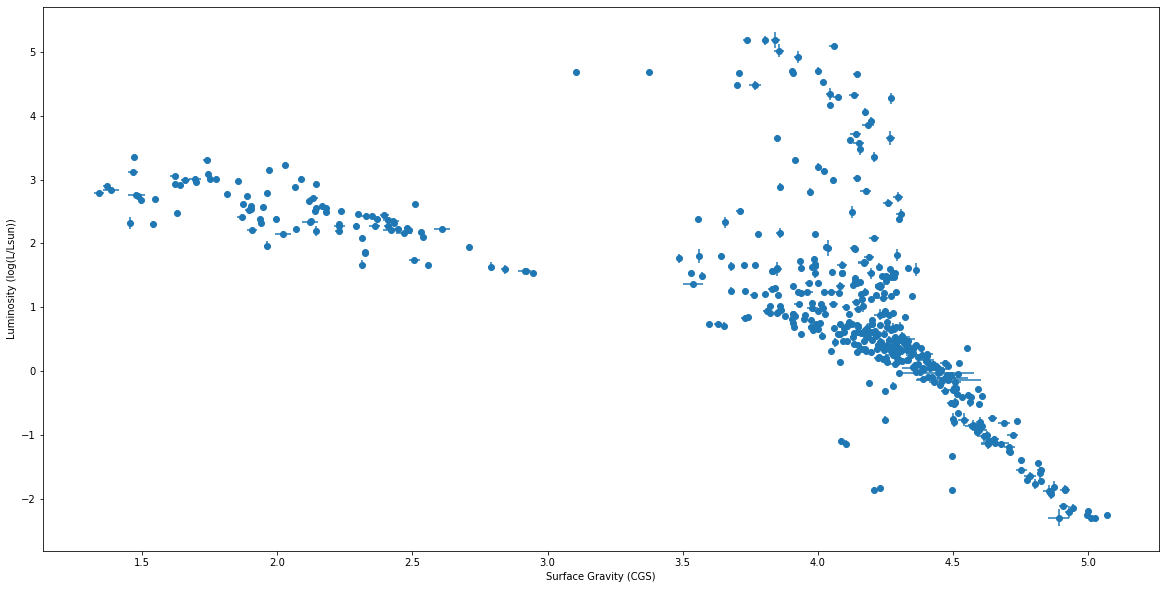

In [6]:
#Data Selection
df = df[["Mass (Msun )", "Radius (Rsun)", "Surface gravity (cgs)", "log (L/Lsun)"]].dropna()
#df1 = df.iloc[1::2]
#df2 = df.iloc[::2]


lumi_raw = np.array(df["log (L/Lsun)"])
surf_g_raw = np.array(df["Surface gravity (cgs)"])

lumi = []
lumi_sigma = []
surf_g = []
surf_g_sigma = []

for i in range(len(lumi_raw)):
    lumi.append(float(lumi_raw[i][0:5]))
    lumi_sigma.append(float(lumi_raw[i][-5:]))
    surf_g.append(float(surf_g_raw[i][0:5]))
    surf_g_sigma.append(float(surf_g_raw[i][-5:]))
    
plt.figure()
plt.errorbar(surf_g, lumi, xerr = surf_g_sigma, yerr = lumi_sigma, fmt = 'o')
plt.xlabel("Surface Gravity (CGS)")
plt.ylabel("Luminosity (log(L/Lsun))")
plt.rcParams['figure.figsize'] = [20, 10]

In [8]:
#Curve Fitting
import scipy.optimize as fitter

def model1(x, a, b):
    return a * x + b
def model2(x, a, b, c):
    return a * x * x + b * x + c

#par0 = np.array([1.0, 1.0, 1.0])

par1, cov1 = fitter.curve_fit(model1, surf_g, lumi,sigma = lumi_sigma)

par2, cov2 = fitter.curve_fit(model2, surf_g, lumi,sigma = lumi_sigma)

#compute reduced chi^2
corr2 = cov2.copy()
for i in range(len(par2)):
    for j in range(len(par2)):
        corr2[i, j] = cov2[i, j] / np.sqrt(cov2[i, i] * cov2[j, j])
#print(corr2)

#chi_sq = np.sum(model(surf_g, *par))
s1 = []
s2 = []
for i in range(len(surf_g)):
    a = ((model2(surf_g[i], *par2) - lumi[i]) / lumi_sigma[i])**2
    s2.append(a)

for i in range(len(surf_g)):
    a = ((model1(surf_g[i], *par1) - lumi[i]) / lumi_sigma[i])**2
    s1.append(a)
    
#chi_sqrd = np.sum(((model(surf_g, *par) - lumi) / lumi_sigma)**2 )
chi_sqrd2 = np.sum(s2)
reduced_chi_sqrd2 = (chi_sqrd2) / (len(surf_g) - len(par2))

chi_sqrd1 = np.sum(s1)
reduced_chi_sqrd1 = (chi_sqrd1) / (len(surf_g) - len(par1))

print('linear fit:')
print('a = ', par1[0])
print('b = ', par1[1])
print ('chi^2 = {0:5.2f}'.format(chi_sqrd1))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_sqrd1))

print('quadratic fit:')
print('a = ', par2[0])
print('b = ', par2[1])
print('c = ', par2[2])
print ('chi^2 = {0:5.2f}'.format(chi_sqrd2))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_sqrd2))

linear fit:
a =  -1.5713970071272554
b =  7.4473983684937455
chi^2 = 1478607.79
chi^2/d.f.=3017.57
quadratic fit:
a =  -1.3167443992829377
b =  7.160299280521216
c =  -5.99706194283463
chi^2 = 856718.32
chi^2/d.f.=1751.98


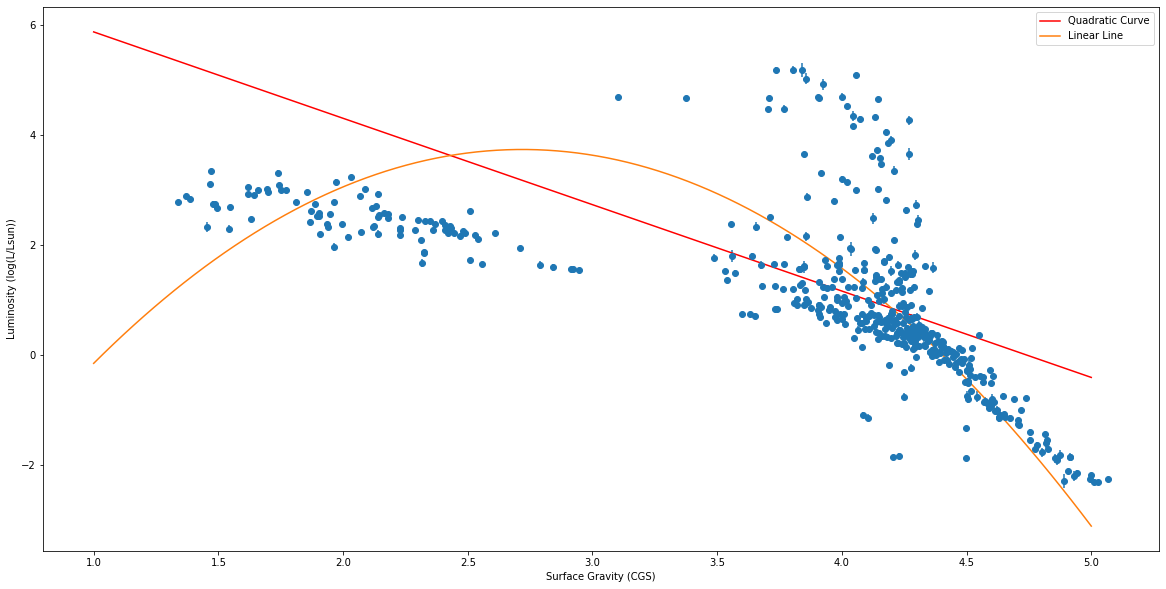

In [9]:
#Plotting Curve with Data
plt.figure()
plt.errorbar(surf_g, lumi, yerr = lumi_sigma, fmt = 'o')
xfit = np.linspace(1, 5, 100)
plt.plot(xfit, model1(xfit, *par1), 'r-', label = 'Quadratic Curve')
plt.plot(xfit, model2(xfit, *par2), label = 'Linear Line')
plt.legend(loc = 1)
plt.xlabel("Surface Gravity (CGS)")
plt.ylabel("Luminosity (log(L/Lsun))")
plt.rcParams['figure.figsize'] = [20, 10]